In [18]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [34]:
glass = pd.read_csv("D://Assignments//KNN//glass.csv")

In [35]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [33]:
glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<AxesSubplot:>

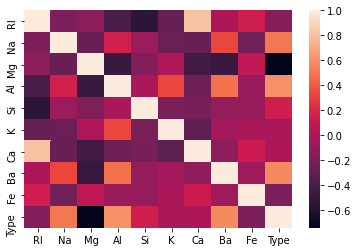

In [30]:
correlation = glass.corr()
sns.heatmap(correlation)

D:\D drive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RI', ylabel='Na'>

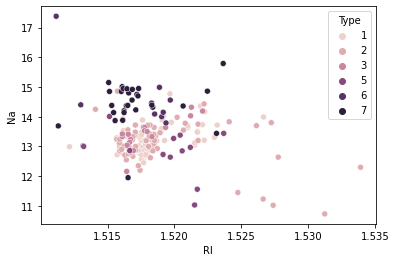

In [36]:
sns.scatterplot(glass['RI'],glass['Na'],hue=glass['Type'])

In [37]:
scaler = StandardScaler()

In [40]:
scaler.fit(glass.drop('Type', axis=1))

StandardScaler()

In [42]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [44]:
scaled_features=scaler.transform(glass.drop('Type', axis=1))
scaled_features

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [45]:
glass_feat = pd.DataFrame(scaled_features,columns=glass.columns[:-1])
glass_feat.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [46]:
glass1 = glass_feat.drop(['Ca', 'K'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(glass1,glass['Type'],test_size=0.2,random_state=40)

In [48]:
glass1

,RI,Na,Mg,Al,Si,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,-0.352877,-0.586451
...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,2.812087,-0.586451


In [49]:
knn = KNeighborsClassifier(n_neighbors=4,metric='manhattan')

In [50]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [51]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [52]:
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.56      0.77      0.65        13
           2       0.80      0.71      0.75        17
           3       0.00      0.00      0.00         4
           5       0.67      0.67      0.67         3
           6       0.50      0.50      0.50         2
           7       1.00      0.75      0.86         4

    accuracy                           0.65        43
   macro avg       0.59      0.57      0.57        43
weighted avg       0.65      0.65      0.64        43



#Accuracy from this method is found to be 65%

### Finding ideal value for KNN

In [70]:
k_range = range(1,50)
k_Scores = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,glass1,glass['Type'],cv=5,scoring='accuracy')
    k_Scores.append(scores.mean())

<function matplotlib.pyplot.show(close=None, block=None)>

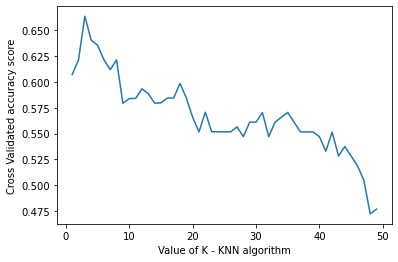

In [71]:
plt.plot(k_range,k_Scores)
plt.xlabel('Value of K - KNN algorithm')
plt.ylabel('Cross Validated accuracy score')
plt.show

In [86]:
num_folds = 20

In [90]:
kfold = KFold(n_splits=200)

In [91]:
model = KNeighborsClassifier(n_neighbors=3)
results = cross_val_score(model, x, y, cv=kfold)

In [92]:
print(results.mean())

0.6875


* Ideal value of K is 3 where accuracy is maximum